<a href="https://colab.research.google.com/github/Jihyesh/codestates_projects_section3/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

## profit rate

In [44]:
from pymongo import MongoClient
import pandas as pd

HOST = 'cluster0.o1n9upq.mongodb.net'
USER = 'Codestates_Jihye'
PASSWORD = ''
DATABASE_NAME = "Financial_Supervisory_Service_Pension"
COLLECTION_NAME = "2022_3Q"
MONGO_URI = f"mongodb+srv://{USER}:{PASSWORD}@{HOST}/{DATABASE_NAME}?retryWrites=true&w=majority"

client = MongoClient(MONGO_URI)
database = client[DATABASE_NAME]
collection = database[COLLECTION_NAME]

df_2022Q3 = collection.find_one()
df_2022Q3['list']
df = pd.DataFrame(df_2022Q3['list'])
df

,area,company,product,launchDate,productType,rcvMethod,feeType,sells,withdraws,guarantees,...,feeRate2,feeRate3,avgEarnRate3,avgEarnRate5,avgEarnRate7,avgEarnRate10,avgFeeRate3,avgFeeRate5,avgFeeRate7,avgFeeRate10
0,손해보험,삼성화재해상보험,연금저축손해보험 삼성화재 연금보험 아름다운생활(1106.8)/(1111.9),2011/06/01,금리연동형,확정기간형,감소형,N,N,Y,...,1.05,1.18,1.32,1.11,0.87,-0.58,1.02,1.20,1.47,3.09
1,손해보험,삼성화재해상보험,연금저축손해보험 삼성화재 연금보험 아름다운생활(1004.6),2010/04/01,금리연동형,확정기간형,감소형,N,N,Y,...,0.78,1.01,1.53,1.37,1.23,0.92,0.66,0.88,1.11,1.82
2,손해보험,삼성화재해상보험,연금저축손해보험 삼성화재 연금보험 아름다운생활(1204.10),2012/04/01,금리연동형,확정기간형,감소형,N,N,Y,...,0.96,1.30,1.26,0.89,0.47,NaN,1.04,1.35,1.79,NaN
3,은행,신한은행,연금저축신탁 안정형제1호,2005/03/23,안정형,연금 수령시 선택형,증가형,N,Y,Y,...,0.80,0.80,0.64,0.94,1.34,1.78,0.79,0.79,0.79,0.81
4,은행,KB국민은행,KB실버웰빙연금신탁(채권형),2004/05/10,채권형,연금 수령시 선택형,증가형,N,Y,Y,...,0.59,0.58,1.51,1.65,1.81,2.22,0.59,0.58,0.58,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,자산운용,현대인베스트먼트자산운용,현대인베스트먼트로우프라이스증권자투자신탁 1(주식)S-P,2015/07/21,주식형,연금 수령시 선택형,증가형,Y,Y,N,...,0.52,0.54,7.85,1.50,NaN,NaN,0.56,0.63,NaN,NaN
2988,자산운용,케이비자산운용,KB연금이머징인덱스증권자투자신탁(주식-파생형)C-E,2017/08/23,파생상품,연금 수령시 선택형,증가형,Y,Y,N,...,0.65,0.68,4.78,NaN,NaN,NaN,0.72,NaN,NaN,NaN
2989,자산운용,다올자산운용,다올KTB글로벌메타버스&우주산업1등주증권자투자신탁(H)[주식] 종류S-P,2021/08/30,주식형,연금 수령시 선택형,증가형,Y,Y,N,...,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2990,자산운용,키움투자자산운용,키움코스닥SmartInvestor목표전환증권투자신탁 1[혼합-재간접형]ClassC-Pe,2018/01/31,재간접,연금 수령시 선택형,증가형,Y,Y,N,...,0.38,0.51,2.35,NaN,NaN,NaN,0.41,NaN,NaN,NaN


In [45]:
df = df.query('area=="자산운용"')

In [46]:
df_a = df.copy()

 linear regression 쓸 꺼라서, number 아닌 데이터는 drop
 
 earnRate 없는 것도 drop

In [47]:
col = df_a.columns

In [48]:
import re
col = [i for i in col if re.search('earn', i)]

In [49]:
df_a = df_a[col + ['productType']]

In [50]:
df_a.head()

,earnRate,earnRate1,earnRate2,earnRate3,productType
21,0.91,-0.26,-0.58,1.39,단기금융
33,-43.44,4.92,28.49,2.56,주식형
38,-45.19,13.40,23.61,-3.04,주식형
57,-28.92,9.44,15.48,2.46,주식형
59,-12.25,12.33,9.89,26.72,재간접


In [51]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 21 to 2990
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   earnRate     1882 non-null   float64
 1   earnRate1    1880 non-null   float64
 2   earnRate2    1875 non-null   float64
 3   earnRate3    1873 non-null   float64
 4   productType  1882 non-null   object 
dtypes: float64(4), object(1)
memory usage: 88.2+ KB


In [52]:
df_a_clean= pd.melt(df_a, id_vars=['productType'],var_name='year', value_name='profit')
df_a_clean

,productType,year,profit
0,단기금융,earnRate,0.91
1,주식형,earnRate,-43.44
2,주식형,earnRate,-45.19
3,주식형,earnRate,-28.92
4,재간접,earnRate,-12.25
...,...,...,...
7523,주식형,earnRate3,0.00
7524,주식형,earnRate3,-4.92
7525,파생상품,earnRate3,10.33
7526,주식형,earnRate3,0.00


In [ ]:
# error_names.이름 = error_names.이름.str.replace('[_,!,.,\d+]', '')
# error_names

In [53]:
df_a = df_a_clean

In [33]:
df_a.year = df_a.year.str.replace('earnRate','2022') # 2022: 2021 4Q ~ 2022 3Q
df_a.year = df_a.year.str.replace('earnRate1','2021')
df_a.year = df_a.year.str.replace('earnRate2','2020')
df_a.year = df_a.year.str.replace('earnRate3','2019')


In [60]:

df_a.loc[df_a['year'] == 'earnRate', 'year'] = 2022
df_a.loc[df_a['year'] == 'earnRate1', 'year'] = 2021
df_a.loc[df_a['year'] == 'earnRate2', 'year'] = 2020
df_a.loc[df_a['year'] == 'earnRate3', 'year'] = 2019



In [61]:
df_a 

,productType,year,profit
0,단기금융,2022,0.91
1,주식형,2022,-43.44
2,주식형,2022,-45.19
3,주식형,2022,-28.92
4,재간접,2022,-12.25
...,...,...,...
7523,주식형,2019,0.00
7524,주식형,2019,-4.92
7525,파생상품,2019,10.33
7526,주식형,2019,0.00


In [62]:
df_a.to_csv('./profit.csv')

## consumer sentiment

In [64]:
from google.colab import files
file_uploaded = files.upload()

Saving 301_DT_511Y002_20221103123425.csv to 301_DT_511Y002_20221103123425.csv


In [65]:
df_c = pd.read_csv('301_DT_511Y002_20221103123425.csv', encoding = 'cp949')
df_c

,CSI코드별,CSI분류코드별,항목,단위,2015.01 월,2015.02 월,2015.03 월,2015.04 월,2015.05 월,2015.06 월,...,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,Unnamed: 98
0,현재생활형편CSI,전체,"소비자동향조사(전국, 월, 2008.9~)",NaN,89.0,89.0,90.0,92.0,93.0,90.0,...,90.0,90.0,92.0,89.0,87.0,81,83.0,85.0,83.0,NaN
1,현재생활형편CSI,남자,"소비자동향조사(전국, 월, 2008.9~)",NaN,89.0,88.0,90.0,91.0,92.0,89.0,...,90.0,91.0,92.0,89.0,86.0,80,82.0,85.0,83.0,NaN
2,현재생활형편CSI,40세미만,"소비자동향조사(전국, 월, 2008.9~)",NaN,89.0,90.0,92.0,92.0,92.0,91.0,...,97.0,97.0,99.0,94.0,91.0,86,90.0,91.0,83.0,NaN
3,현재생활형편CSI,봉급생활자,"소비자동향조사(전국, 월, 2008.9~)",NaN,93.0,91.0,92.0,93.0,95.0,91.0,...,95.0,95.0,97.0,93.0,90.0,83,86.0,87.0,85.0,NaN
4,현재생활형편CSI,100만원미만,"소비자동향조사(전국, 월, 2008.9~)",NaN,79.0,77.0,76.0,84.0,85.0,79.0,...,68.0,70.0,72.0,71.0,71.0,69,69.0,75.0,73.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,주거비 지출전망CSI,60-70세,"소비자동향조사(전국, 월, 2008.9~)",NaN,101.0,99.0,100.0,101.0,100.0,100.0,...,101.0,103.0,100.0,102.0,104.0,107,106.0,103.0,109.0,NaN
525,주거비 지출전망CSI,300-400만원,"소비자동향조사(전국, 월, 2008.9~)",NaN,107.0,107.0,108.0,108.0,107.0,108.0,...,107.0,106.0,107.0,110.0,109.0,114,113.0,111.0,111.0,NaN
526,주거비 지출전망CSI,70세이상,"소비자동향조사(전국, 월, 2008.9~)",NaN,98.0,101.0,97.0,99.0,98.0,97.0,...,103.0,105.0,105.0,104.0,105.0,105,100.0,105.0,106.0,NaN
527,주거비 지출전망CSI,400-500만원,"소비자동향조사(전국, 월, 2008.9~)",NaN,107.0,105.0,105.0,106.0,106.0,107.0,...,104.0,106.0,104.0,106.0,104.0,114,109.0,109.0,107.0,NaN


In [68]:
df_c_clean = df_c.copy()

In [71]:
df_c_clean.columns

Index(['CSI코드별', 'CSI분류코드별', '항목', '단위', '2015.01 월', '2015.02 월', '2015.03 월',
       '2015.04 월', '2015.05 월', '2015.06 월', '2015.07 월', '2015.08 월',
       '2015.09 월', '2015.10 월', '2015.11 월', '2015.12 월', '2016.01 월',
       '2016.02 월', '2016.03 월', '2016.04 월', '2016.05 월', '2016.06 월',
       '2016.07 월', '2016.08 월', '2016.09 월', '2016.10 월', '2016.11 월',
       '2016.12 월', '2017.01 월', '2017.02 월', '2017.03 월', '2017.04 월',
       '2017.05 월', '2017.06 월', '2017.07 월', '2017.08 월', '2017.09 월',
       '2017.10 월', '2017.11 월', '2017.12 월', '2018.01 월', '2018.02 월',
       '2018.03 월', '2018.04 월', '2018.05 월', '2018.06 월', '2018.07 월',
       '2018.08 월', '2018.09 월', '2018.10 월', '2018.11 월', '2018.12 월',
       '2019.01 월', '2019.02 월', '2019.03 월', '2019.04 월', '2019.05 월',
       '2019.06 월', '2019.07 월', '2019.08 월', '2019.09 월', '2019.10 월',
       '2019.11 월', '2019.12 월', '2020.01 월', '2020.02 월', '2020.03 월',
       '2020.04 월', '2020.05 월', '2020.06 월', '2020.07 월

In [77]:
df_c_clean.항목.unique()

array(['소비자동향조사(전국, 월, 2008.9~)'], dtype=object)

In [79]:
df_c_clean[['CSI코드별','CSI분류코드별','2018.12 월','2019.12 월','2020.12 월','2021.12 월']]

,CSI코드별,CSI분류코드별,2018.12 월,2019.12 월,2020.12 월,2021.12 월
0,현재생활형편CSI,전체,89.0,92.0,86.0,91.0
1,현재생활형편CSI,남자,90.0,91.0,86.0,91.0
2,현재생활형편CSI,40세미만,92.0,96.0,92.0,97.0
3,현재생활형편CSI,봉급생활자,92.0,95.0,91.0,95.0
4,현재생활형편CSI,100만원미만,81.0,81.0,70.0,74.0
...,...,...,...,...,...,...
524,주거비 지출전망CSI,60-70세,102.0,100.0,101.0,103.0
525,주거비 지출전망CSI,300-400만원,107.0,106.0,104.0,106.0
526,주거비 지출전망CSI,70세이상,100.0,103.0,104.0,104.0
527,주거비 지출전망CSI,400-500만원,107.0,102.0,106.0,106.0


In [81]:
df_c_clean.CSI분류코드별.unique()

array(['전체', '남자', '40세미만', '봉급생활자', '100만원미만', '자가', '서울', '여자',
       '40-50세', '자영업자', '100-200만원', '임차 등', '6대광역시', '50-60세', '기타',
       '200-300만원', '기타도시', '60-70세', '300-400만원', '70세이상', '400-500만원',
       '500만원이상'], dtype=object)

In [94]:
# df.rename(columns={'Before':'After'})
col = df_c_clean[['CSI코드별','CSI분류코드별','2018.12 월','2019.12 월','2020.12 월','2021.12 월']].columns
list(col)
[i.strip('월') for i in list(col)]


['CSI코드별', 'CSI분류코드별', '2018.12 ', '2019.12 ', '2020.12 ', '2021.12 ']

In [96]:
df_c_clean2 =df_c_clean[['CSI코드별','CSI분류코드별','2018.12 월','2019.12 월','2020.12 월','2021.12 월']]
df_c_clean2

,CSI코드별,CSI분류코드별,2018.12 월,2019.12 월,2020.12 월,2021.12 월
0,현재생활형편CSI,전체,89.0,92.0,86.0,91.0
1,현재생활형편CSI,남자,90.0,91.0,86.0,91.0
2,현재생활형편CSI,40세미만,92.0,96.0,92.0,97.0
3,현재생활형편CSI,봉급생활자,92.0,95.0,91.0,95.0
4,현재생활형편CSI,100만원미만,81.0,81.0,70.0,74.0
...,...,...,...,...,...,...
524,주거비 지출전망CSI,60-70세,102.0,100.0,101.0,103.0
525,주거비 지출전망CSI,300-400만원,107.0,106.0,104.0,106.0
526,주거비 지출전망CSI,70세이상,100.0,103.0,104.0,104.0
527,주거비 지출전망CSI,400-500만원,107.0,102.0,106.0,106.0


In [97]:
df_c_clean2.columns = [i.strip('월') for i in list(col)]

In [105]:
df_c_clean2['CSI코드별'].unique()

array(['현재생활형편CSI', '생활형편전망CSI', '가계수입전망CSI', '내구재 지출전망CSI', '현재가계저축CSI',
       '물가수준전망(1년후)CSI', '현재경기판단CSI', '향후경기전망CSI', '소비지출전망CSI',
       '의류비 지출전망CSI', '가계저축전망CSI', '주택가격전망CSI', '취업기회전망CSI',
       '외식비 지출전망CSI', '현재가계부채CSI', '임금수준전망CSI', '금리수준전망CSI',
       '여행비 지출전망CSI', '가계부채전망CSI', '교육비 지출전망CSI', '의료·보건비 지출전망CSI',
       '교양·오락·문화생활비 지출전망CSI', '소비자심리지수', '교통비 및 통신비 지출전망CSI',
       '주거비 지출전망CSI'], dtype=object)

In [111]:
# sent = [i for i in df_c_clean2['CSI코드별'].unique() if re.search('지출',i)] + ['소비자심리지수', '가계수입전망CSI']

In [113]:
sent = ['소비지출전망CSI','가계저축전망CSI','생활형편전망CSI','향후경기전망CSI','취업기회전망CSI','금리수준전망CSI', '가계수입전망CSI', '소비지출전망CSI','가계저축전망CSI','가계부채전망CSI','물가수준전망CSI','주택가격전망CSI','임금수준전망CSI','소비자심리지수']

In [122]:
df_c_clean = df_c_clean2.loc[df_c_clean2['CSI코드별'].isin(sent)].query('CSI분류코드별=="전체"').drop(columns= 'CSI분류코드별')

In [137]:
df_c_clean2 = df_c_clean.set_index('CSI코드별').T

In [138]:
df_c_clean2

CSI코드별,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
2018.12,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
2019.12,94.0,98.0,82.0,109.0,95.0,125.0,84.0,117.0,91.0,99.0,101.1
2020.12,89.0,93.0,81.0,99.0,93.0,132.0,74.0,109.0,99.0,101.0,90.9
2021.12,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8


In [139]:
df_c_clean2.insert(0,'year',[2019,2020,2021,2022])

In [140]:
df_c_clean2

CSI코드별,year,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
2018.12,2019,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
2019.12,2020,94.0,98.0,82.0,109.0,95.0,125.0,84.0,117.0,91.0,99.0,101.1
2020.12,2021,89.0,93.0,81.0,99.0,93.0,132.0,74.0,109.0,99.0,101.0,90.9
2021.12,2022,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8


In [152]:
df_c_clean2

CSI코드별,year,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
2018.12,2019,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
2019.12,2020,94.0,98.0,82.0,109.0,95.0,125.0,84.0,117.0,91.0,99.0,101.1
2020.12,2021,89.0,93.0,81.0,99.0,93.0,132.0,74.0,109.0,99.0,101.0,90.9
2021.12,2022,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8


In [146]:
df_c_clean2.reset_index()

CSI코드별,index,year,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
0,2018.12,2019,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
1,2019.12,2020,94.0,98.0,82.0,109.0,95.0,125.0,84.0,117.0,91.0,99.0,101.1
2,2020.12,2021,89.0,93.0,81.0,99.0,93.0,132.0,74.0,109.0,99.0,101.0,90.9
3,2021.12,2022,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8


In [155]:
df_c = df_c_clean2

## Inner Join

In [153]:
df_a

,productType,year,profit
0,단기금융,2022,0.91
1,주식형,2022,-43.44
2,주식형,2022,-45.19
3,주식형,2022,-28.92
4,재간접,2022,-12.25
...,...,...,...
7523,주식형,2019,0.00
7524,주식형,2019,-4.92
7525,파생상품,2019,10.33
7526,주식형,2019,0.00


In [156]:
df_c

CSI코드별,year,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
2018.12,2019,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
2019.12,2020,94.0,98.0,82.0,109.0,95.0,125.0,84.0,117.0,91.0,99.0,101.1
2020.12,2021,89.0,93.0,81.0,99.0,93.0,132.0,74.0,109.0,99.0,101.0,90.9
2021.12,2022,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8


In [160]:
df_joined = pd.merge(left = df_a , right = df_c, how = "inner", on = "year")

In [161]:
df_joined

,productType,year,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
0,단기금융,2022,0.91,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
1,주식형,2022,-43.44,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
2,주식형,2022,-45.19,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
3,주식형,2022,-28.92,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
4,재간접,2022,-12.25,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7523,주식형,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7524,주식형,2019,-4.92,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7525,파생상품,2019,10.33,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7526,주식형,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4


In [164]:
df_joined.groupby(by='productType').mean()

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
productType,,,,,,,,,,,,
단기금융,0.985284,92.5,97.5,80.75,106.75,94.5,114.75,80.25,115.5,114.75,100.25,98.3
부동산,0.262949,92.5,97.5,80.75,106.75,94.5,114.75,80.25,115.5,114.75,100.25,98.3
재간접,3.300718,92.5,97.5,80.75,106.75,94.5,114.75,80.25,115.5,114.75,100.25,98.3
주식형,2.216995,92.5,97.5,80.75,106.75,94.5,114.75,80.25,115.5,114.75,100.25,98.3
채권형,-0.071865,92.5,97.5,80.75,106.75,94.5,114.75,80.25,115.5,114.75,100.25,98.3
특별자산,1.305833,92.5,97.5,80.75,106.75,94.5,114.75,80.25,115.5,114.75,100.25,98.3
파생상품,2.652104,92.5,97.5,80.75,106.75,94.5,114.75,80.25,115.5,114.75,100.25,98.3
혼합자산,-0.176250,92.5,97.5,80.75,106.75,94.5,114.75,80.25,115.5,114.75,100.25,98.3
혼합주식형,1.565885,92.5,97.5,80.75,106.75,94.5,114.75,80.25,115.5,114.75,100.25,98.3


In [166]:
df_joined[df_joined.productType == '단기금융']

,productType,year,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
0,단기금융,2022,0.91,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
10,단기금융,2022,1.73,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
18,단기금융,2022,1.18,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
27,단기금융,2022,1.59,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
37,단기금융,2022,1.27,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6865,단기금융,2019,1.43,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7008,단기금융,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7037,단기금융,2019,1.72,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7223,단기금융,2019,1.95,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4


In [167]:
df_joined[df_joined.productType == '부동산']

,productType,year,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
156,부동산,2022,-24.06,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
325,부동산,2022,-5.16,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
409,부동산,2022,-23.63,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
557,부동산,2022,-21.28,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
593,부동산,2022,-6.70,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7420,부동산,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7429,부동산,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7434,부동산,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7472,부동산,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4


In [168]:
df_joined[df_joined.productType == '재간접']

,productType,year,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
4,재간접,2022,-12.25,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
5,재간접,2022,-19.13,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
7,재간접,2022,1.76,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
8,재간접,2022,-37.55,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
9,재간접,2022,-28.16,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7514,재간접,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7519,재간접,2019,16.04,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7520,재간접,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7522,재간접,2019,NaN,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4


In [169]:
df_joined[df_joined.productType == '주식형']

,productType,year,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
1,주식형,2022,-43.44,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
2,주식형,2022,-45.19,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
3,주식형,2022,-28.92,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
6,주식형,2022,-46.98,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
11,주식형,2022,-23.28,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,주식형,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7521,주식형,2019,-0.90,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7523,주식형,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7524,주식형,2019,-4.92,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4


In [170]:
df_joined[df_joined.productType == '채권형']

,productType,year,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
47,채권형,2022,-0.67,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
56,채권형,2022,0.91,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
60,채권형,2022,-2.04,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
64,채권형,2022,-5.80,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
70,채권형,2022,-11.06,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,채권형,2019,2.33,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7450,채권형,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7456,채권형,2019,2.08,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7478,채권형,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4


In [171]:
df_joined[df_joined.productType == '특별자산']

,productType,year,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
376,특별자산,2022,-6.50,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
759,특별자산,2022,-1.43,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
810,특별자산,2022,7.95,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
814,특별자산,2022,10.16,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
1083,특별자산,2022,-6.36,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
1161,특별자산,2022,23.30,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
1217,특별자산,2022,15.26,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
1452,특별자산,2022,12.10,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
1773,특별자산,2022,-6.24,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
2258,특별자산,2021,2.57,89.0,93.0,81.0,99.0,93.0,132.0,74.0,109.0,99.0,101.0,90.9


In [172]:
df_joined[df_joined.productType == '파생상품']


,productType,year,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
90,파생상품,2022,-19.26,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
105,파생상품,2022,-28.00,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
117,파생상품,2022,-35.49,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
131,파생상품,2022,-62.84,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
144,파생상품,2022,-53.57,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7443,파생상품,2019,14.11,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7466,파생상품,2019,12.07,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7488,파생상품,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7490,파생상품,2019,10.72,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4


In [173]:
df_joined[df_joined.productType == '혼합자산']


,productType,year,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
387,혼합자산,2022,-11.54,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
510,혼합자산,2022,-12.36,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
558,혼합자산,2022,-10.35,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
688,혼합자산,2022,-27.65,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
697,혼합자산,2022,-11.73,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7042,혼합자산,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7067,혼합자산,2019,15.54,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7087,혼합자산,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7128,혼합자산,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4


In [174]:
df_joined[df_joined.productType == '혼합주식형']


,productType,year,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
20,혼합주식형,2022,-32.23,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
40,혼합주식형,2022,-28.47,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
44,혼합주식형,2022,-27.58,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
61,혼합주식형,2022,-159.32,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
67,혼합주식형,2022,-29.35,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301,혼합주식형,2019,4.74,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7308,혼합주식형,2019,-2.16,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7363,혼합주식형,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7398,혼합주식형,2019,-7.21,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4


In [175]:
df_joined[df_joined.productType == '혼합채권형']


,productType,year,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
45,혼합채권형,2022,-9.68,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
62,혼합채권형,2022,-20.96,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
100,혼합채권형,2022,-12.27,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
107,혼합채권형,2022,1.95,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
129,혼합채권형,2022,-19.25,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,혼합채권형,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7476,혼합채권형,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7477,혼합채권형,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7497,혼합채권형,2019,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4


In [178]:
df_joined_4yr = df_joined.drop(columns ='year')
df_joined_4yr

,productType,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
0,단기금융,0.91,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
1,주식형,-43.44,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
2,주식형,-45.19,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
3,주식형,-28.92,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
4,재간접,-12.25,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7523,주식형,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7524,주식형,-4.92,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7525,파생상품,10.33,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7526,주식형,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4


In [186]:
df_joined_4yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7528 entries, 0 to 7527
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productType  7528 non-null   object 
 1   profit       7510 non-null   float64
 2   생활형편전망CSI    7528 non-null   float64
 3   가계수입전망CSI    7528 non-null   float64
 4   향후경기전망CSI    7528 non-null   float64
 5   소비지출전망CSI    7528 non-null   float64
 6   가계저축전망CSI    7528 non-null   float64
 7   주택가격전망CSI    7528 non-null   float64
 8   취업기회전망CSI    7528 non-null   float64
 9   임금수준전망CSI    7528 non-null   float64
 10  금리수준전망CSI    7528 non-null   float64
 11  가계부채전망CSI    7528 non-null   float64
 12  소비자심리지수      7528 non-null   float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [188]:
df_joined_4yr = df_joined_4yr.dropna()

In [189]:
df_joined_4yr.shape

(7510, 13)

# Model-재간접

In [192]:
df_fund_of_fund = df_joined_4yr[df_joined_4yr.productType == '재간접']
df_fund_of_fund = df_fund_of_fund.drop(columns='productType')
df_fund_of_fund

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
4,-12.25,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
5,-19.13,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
7,1.76,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
8,-37.55,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
9,-28.16,96.0,100.0,88.0,110.0,97.0,107.0,89.0,117.0,137.0,100.0,103.8
...,...,...,...,...,...,...,...,...,...,...,...,...
7509,4.98,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7514,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7519,16.04,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4
7520,0.00,91.0,99.0,72.0,109.0,93.0,95.0,74.0,119.0,132.0,101.0,97.4


In [205]:
df_fund_of_fund = df_fund_of_fund.reset_index(drop=True)

In [208]:
fof_cor = df_fund_of_fund.corr()
fof_cor

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
profit,1.00,-0.40,-0.28,-0.39,-0.22,-0.46,0.15,-0.42,-0.12,-0.32,0.11,-0.35
생활형편전망CSI,-0.40,1.00,0.79,0.64,0.80,0.95,-0.27,0.97,0.61,0.34,-0.73,0.97
가계수입전망CSI,-0.28,0.79,1.00,0.08,0.98,0.62,-0.77,0.61,0.94,0.65,-0.39,0.90
향후경기전망CSI,-0.39,0.64,0.08,1.00,0.05,0.83,0.40,0.82,-0.22,-0.05,-0.51,0.45
소비지출전망CSI,-0.22,0.80,0.98,0.05,1.00,0.59,-0.69,0.61,0.96,0.50,-0.52,0.91
가계저축전망CSI,-0.46,0.95,0.62,0.83,0.59,1.00,-0.11,0.99,0.36,0.32,-0.64,0.86
주택가격전망CSI,0.15,-0.27,-0.77,0.40,-0.69,-0.11,1.00,-0.04,-0.79,-0.88,-0.26,-0.44
취업기회전망CSI,-0.42,0.97,0.61,0.82,0.61,0.99,-0.04,1.00,0.38,0.19,-0.75,0.88
임금수준전망CSI,-0.12,0.61,0.94,-0.22,0.96,0.36,-0.79,0.38,1.00,0.52,-0.36,0.77
금리수준전망CSI,-0.32,0.34,0.65,-0.05,0.50,0.32,-0.88,0.19,0.52,1.00,0.38,0.41


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

# sns.scatterplot(x=df_fund_of_fund.소비지출전망CSI, y=df_fund_of_fund.profit )
sns.heatmap(fof_cor)

### Train, Test split

In [193]:
## Train, Eval, Test split

# train, test 데이터를 나눠주겠습니다. 

from sklearn.model_selection import train_test_split
X = df_fund_of_fund.drop('profit', axis=1)
y = df_fund_of_fund['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train, test 데이터가 잘 나눠졌는지 확인해봅니다.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2395, 11), (599, 11), (2395,), (599,))

### Baseline

In [195]:
## baseline : 3년 평균 수익률

y_train.mean()

3.7729185803757828

In [197]:
y_train.describe()

count    2395.000000
mean        3.772919
std        27.478092
min      -269.820000
25%        -6.140000
50%         4.280000
75%        13.635000
max       566.170000
Name: profit, dtype: float64

In [196]:
## baseline score

from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()]*len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 15.551524848653902


In [210]:
# 성능 확인용 함수

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.options.display.float_format = '{:,.2f}'.format


def eval_models(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

In [216]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3) #LinearRegression.score는 R2
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

### OLS

In [219]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train, y_train)

# 성능 비교
ols_train, ols_val, ols_test = print_score(ols, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.263
검증 세트 r2_score : 0.265
테스트 세트 r2_score : 0.299


In [211]:
from sklearn.feature_selection import f_regression, SelectKBest

# selector를 정의합니다. 
# 총 11개 특성 중 5개만 사용하는 경우

selector = SelectKBest(score_func= f_regression, k=5)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)

# 어떤 특성이 선택되었는지 확인해봅시다.
selector.get_feature_names_out()

array(['생활형편전망CSI', '향후경기전망CSI', '가계저축전망CSI', '취업기회전망CSI', '소비자심리지수'],
      dtype=object)

In [221]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 11개의 특성으로 다중선형회귀 모델을 만들어보겠습니다.
ols_fs = LinearRegression()
ols_fs.fit(X_train, y_train)

# 성능 비교
ols_fs_train, ols_fs_val, ols_fs_test = print_score(ols_fs, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.263
검증 세트 r2_score : 0.265
테스트 세트 r2_score : 0.299


### RidgeCV

In [222]:
# RidgeCV

from sklearn.linear_model import RidgeCV, LassoCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)          # 50번의 시험을 통해 RSS+Penalty가 낮고, variance도 낮은 alpha 값 찾기?
ridge = RidgeCV(alphas=alphas, cv=5)    # 5 folds, 10가지 lamda를 시험.
ridge.fit(X_train, y_train)

print("alpha: ", ridge.alpha_)


# 성능 확인
ridge_train, ridge_val, ridge_test = print_score(ridge, X_train, y_train, X_test, y_test)

alpha:  91
학습 세트 r2_score : 0.264
검증 세트 r2_score : 0.268
테스트 세트 r2_score : 0.299


### LassoCV

In [223]:
# LassoCV

from sklearn.linear_model import LassoCV

# lassocv로 학습
alphas = np.arange(10, 200, 10)
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train, y_train)

print("alpha: ", lasso.alpha_)

# 성능 확인
lasso_train, lasso_val, lasso_test = print_score(lasso, X_train, y_train, X_test, y_test)

alpha:  10
학습 세트 r2_score : 0.26
검증 세트 r2_score : 0.264
테스트 세트 r2_score : 0.294


## 한계점

3년치 수익률, 소비자 심리지수 관계만으로 수익률을 예측하려고 해서 상관도가 거의 없는 모델

금리, 기업 투자 계획을 추가하여 상관도가 높은 특성을 추가할 필요가 있음
3년치보다는 최소 10년 이상의 데이터가 있으면 상관도가 보일 수도 있음

# Model-주식형

In [224]:
df_fund_of_fund = df_joined_4yr[df_joined_4yr.productType == '주식형']
df_fund_of_fund = df_fund_of_fund.drop(columns='productType')
df_fund_of_fund

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
1,-43.44,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
2,-45.19,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
3,-28.92,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
6,-46.98,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
11,-23.28,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...
7518,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7521,-0.90,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7523,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7524,-4.92,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40


In [225]:
df_fund_of_fund = df_fund_of_fund.reset_index(drop=True)

In [226]:
fof_cor = df_fund_of_fund.corr()
fof_cor

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
profit,1.00,-0.42,-0.32,-0.44,-0.22,-0.52,0.25,-0.44,-0.10,-0.50,-0.02,-0.36
생활형편전망CSI,-0.42,1.00,0.79,0.64,0.80,0.95,-0.27,0.96,0.60,0.33,-0.73,0.97
가계수입전망CSI,-0.32,0.79,1.00,0.07,0.98,0.62,-0.77,0.61,0.94,0.65,-0.39,0.90
향후경기전망CSI,-0.44,0.64,0.07,1.00,0.05,0.83,0.40,0.82,-0.22,-0.05,-0.51,0.45
소비지출전망CSI,-0.22,0.80,0.98,0.05,1.00,0.59,-0.69,0.61,0.96,0.50,-0.52,0.91
가계저축전망CSI,-0.52,0.95,0.62,0.83,0.59,1.00,-0.11,0.99,0.35,0.31,-0.64,0.86
주택가격전망CSI,0.25,-0.27,-0.77,0.40,-0.69,-0.11,1.00,-0.04,-0.79,-0.88,-0.26,-0.44
취업기회전망CSI,-0.44,0.96,0.61,0.82,0.61,0.99,-0.04,1.00,0.38,0.18,-0.75,0.88
임금수준전망CSI,-0.10,0.60,0.94,-0.22,0.96,0.35,-0.79,0.38,1.00,0.52,-0.35,0.77
금리수준전망CSI,-0.50,0.33,0.65,-0.05,0.50,0.31,-0.88,0.18,0.52,1.00,0.38,0.40


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_

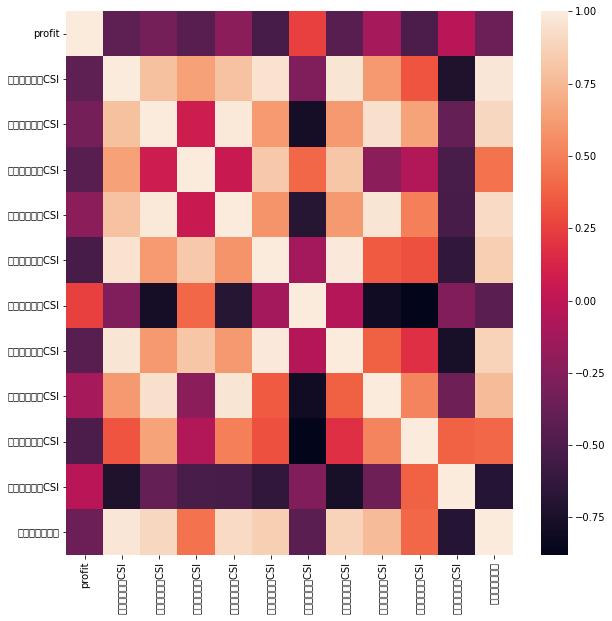

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

# sns.scatterplot(x=df_fund_of_fund.소비지출전망CSI, y=df_fund_of_fund.profit )
sns.heatmap(fof_cor)

### Train, Test split

In [228]:
## Train, Eval, Test split

# train, test 데이터를 나눠주겠습니다. 

from sklearn.model_selection import train_test_split
X = df_fund_of_fund.drop('profit', axis=1)
y = df_fund_of_fund['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train, test 데이터가 잘 나눠졌는지 확인해봅니다.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1964, 11), (492, 11), (1964,), (492,))

### Baseline

In [229]:
## baseline : 3년 평균 수익률

y_train.mean()

2.0754531568228107

In [230]:
y_train.describe()

count   1,964.00
mean        2.08
std        30.06
min      -293.69
25%       -12.12
50%         4.31
75%        20.39
max       344.92
Name: profit, dtype: float64

In [231]:
## baseline score

from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()]*len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 20.909069244361856


In [232]:
# 성능 확인용 함수

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.options.display.float_format = '{:,.2f}'.format


def eval_models(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

In [233]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3) #LinearRegression.score는 R2
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

### OLS

In [234]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train, y_train)

# 성능 비교
ols_train, ols_val, ols_test = print_score(ols, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.461
검증 세트 r2_score : 0.458
테스트 세트 r2_score : 0.566


In [235]:
from sklearn.feature_selection import f_regression, SelectKBest

# selector를 정의합니다. 
# 총 11개 특성 중 5개만 사용하는 경우

selector = SelectKBest(score_func= f_regression, k=5)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)

# 어떤 특성이 선택되었는지 확인해봅시다.
selector.get_feature_names_out()

array(['생활형편전망CSI', '향후경기전망CSI', '가계저축전망CSI', '취업기회전망CSI', '금리수준전망CSI'],
      dtype=object)

In [236]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 11개의 특성으로 다중선형회귀 모델을 만들어보겠습니다.
ols_fs = LinearRegression()
ols_fs.fit(X_train, y_train)

# 성능 비교
ols_fs_train, ols_fs_val, ols_fs_test = print_score(ols_fs, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.461
검증 세트 r2_score : 0.458
테스트 세트 r2_score : 0.566


### RidgeCV

In [237]:
# RidgeCV

from sklearn.linear_model import RidgeCV, LassoCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)          # 50번의 시험을 통해 RSS+Penalty가 낮고, variance도 낮은 alpha 값 찾기?
ridge = RidgeCV(alphas=alphas, cv=5)    # 5 folds, 10가지 lamda를 시험.
ridge.fit(X_train, y_train)

print("alpha: ", ridge.alpha_)


# 성능 확인
ridge_train, ridge_val, ridge_test = print_score(ridge, X_train, y_train, X_test, y_test)

alpha:  91
학습 세트 r2_score : 0.462
검증 세트 r2_score : 0.461
테스트 세트 r2_score : 0.566


### LassoCV

In [238]:
# LassoCV

from sklearn.linear_model import LassoCV

# lassocv로 학습
alphas = np.arange(10, 200, 10)
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train, y_train)

print("alpha: ", lasso.alpha_)

# 성능 확인
lasso_train, lasso_val, lasso_test = print_score(lasso, X_train, y_train, X_test, y_test)

alpha:  10
학습 세트 r2_score : 0.455
검증 세트 r2_score : 0.456
테스트 세트 r2_score : 0.557


# Model - 단기금융

In [239]:
df_fund_of_fund = df_joined_4yr[df_joined_4yr.productType == '단기금융']
df_fund_of_fund = df_fund_of_fund.drop(columns='productType')
df_fund_of_fund

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
0,0.91,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
10,1.73,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
18,1.18,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
27,1.59,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
37,1.27,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...
6865,1.43,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7008,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7037,1.72,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7223,1.95,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40


In [240]:
df_fund_of_fund = df_fund_of_fund.reset_index(drop=True)

In [241]:
fof_cor = df_fund_of_fund.corr()
fof_cor

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
profit,1.00,0.32,0.55,-0.04,0.46,0.27,-0.66,0.20,0.47,0.70,0.16,0.38
생활형편전망CSI,0.32,1.00,0.79,0.64,0.80,0.95,-0.27,0.96,0.60,0.33,-0.73,0.97
가계수입전망CSI,0.55,0.79,1.00,0.07,0.98,0.62,-0.77,0.61,0.94,0.65,-0.39,0.90
향후경기전망CSI,-0.04,0.64,0.07,1.00,0.05,0.83,0.40,0.82,-0.22,-0.05,-0.51,0.45
소비지출전망CSI,0.46,0.80,0.98,0.05,1.00,0.59,-0.69,0.61,0.96,0.50,-0.52,0.91
가계저축전망CSI,0.27,0.95,0.62,0.83,0.59,1.00,-0.11,0.99,0.35,0.31,-0.64,0.86
주택가격전망CSI,-0.66,-0.27,-0.77,0.40,-0.69,-0.11,1.00,-0.04,-0.79,-0.88,-0.26,-0.44
취업기회전망CSI,0.20,0.96,0.61,0.82,0.61,0.99,-0.04,1.00,0.38,0.18,-0.75,0.88
임금수준전망CSI,0.47,0.60,0.94,-0.22,0.96,0.35,-0.79,0.38,1.00,0.52,-0.35,0.77
금리수준전망CSI,0.70,0.33,0.65,-0.05,0.50,0.31,-0.88,0.18,0.52,1.00,0.38,0.40


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_

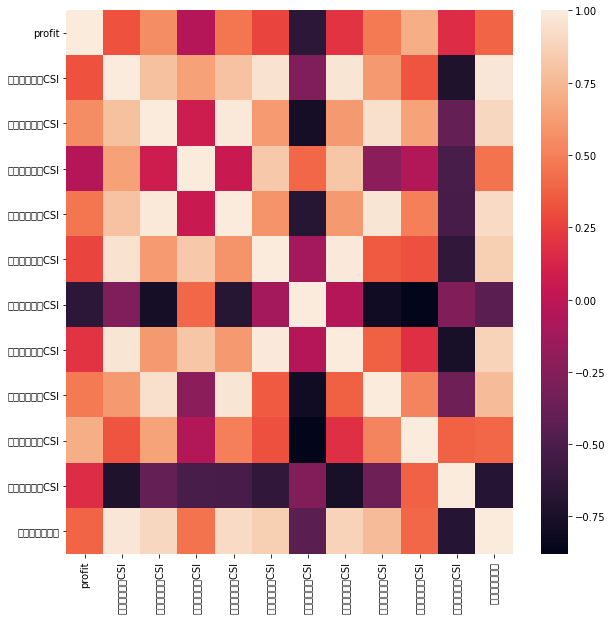

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

# sns.scatterplot(x=df_fund_of_fund.소비지출전망CSI, y=df_fund_of_fund.profit )
sns.heatmap(fof_cor)

### Train, Test split

In [243]:
## Train, Eval, Test split

# train, test 데이터를 나눠주겠습니다. 

from sklearn.model_selection import train_test_split
X = df_fund_of_fund.drop('profit', axis=1)
y = df_fund_of_fund['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train, test 데이터가 잘 나눠졌는지 확인해봅니다.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 11), (36, 11), (140,), (36,))

### Baseline

In [244]:
## baseline : 3년 평균 수익률

y_train.mean()

0.9727857142857143

In [245]:
y_train.describe()

count   140.00
mean      0.97
std       0.57
min      -0.75
25%       0.62
50%       1.02
75%       1.45
max       2.51
Name: profit, dtype: float64

In [246]:
## baseline score

from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()]*len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 0.47127755102040814


In [247]:
# 성능 확인용 함수

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.options.display.float_format = '{:,.2f}'.format


def eval_models(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

In [248]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3) #LinearRegression.score는 R2
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

### OLS

In [249]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train, y_train)

# 성능 비교
ols_train, ols_val, ols_test = print_score(ols, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.488
검증 세트 r2_score : 0.467
테스트 세트 r2_score : 0.551


In [250]:
from sklearn.feature_selection import f_regression, SelectKBest

# selector를 정의합니다. 
# 총 11개 특성 중 5개만 사용하는 경우

selector = SelectKBest(score_func= f_regression, k=5)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)

# 어떤 특성이 선택되었는지 확인해봅시다.
selector.get_feature_names_out()

array(['가계수입전망CSI', '소비지출전망CSI', '주택가격전망CSI', '임금수준전망CSI', '금리수준전망CSI'],
      dtype=object)

In [251]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 11개의 특성으로 다중선형회귀 모델을 만들어보겠습니다.
ols_fs = LinearRegression()
ols_fs.fit(X_train, y_train)

# 성능 비교
ols_fs_train, ols_fs_val, ols_fs_test = print_score(ols_fs, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.488
검증 세트 r2_score : 0.467
테스트 세트 r2_score : 0.551


### RidgeCV

In [252]:
# RidgeCV

from sklearn.linear_model import RidgeCV, LassoCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)          # 50번의 시험을 통해 RSS+Penalty가 낮고, variance도 낮은 alpha 값 찾기?
ridge = RidgeCV(alphas=alphas, cv=5)    # 5 folds, 10가지 lamda를 시험.
ridge.fit(X_train, y_train)

print("alpha: ", ridge.alpha_)


# 성능 확인
ridge_train, ridge_val, ridge_test = print_score(ridge, X_train, y_train, X_test, y_test)

alpha:  91
학습 세트 r2_score : 0.488
검증 세트 r2_score : 0.466
테스트 세트 r2_score : 0.551


### LassoCV

In [253]:
# LassoCV

from sklearn.linear_model import LassoCV

# lassocv로 학습
alphas = np.arange(10, 200, 10)
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train, y_train)

print("alpha: ", lasso.alpha_)

# 성능 확인
lasso_train, lasso_val, lasso_test = print_score(lasso, X_train, y_train, X_test, y_test)

alpha:  190
학습 세트 r2_score : 0.0
검증 세트 r2_score : -0.006
테스트 세트 r2_score : -0.009


# Model - 채권형

In [254]:
df_fund_of_fund = df_joined_4yr[df_joined_4yr.productType == '채권형']
df_fund_of_fund = df_fund_of_fund.drop(columns='productType')
df_fund_of_fund

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
47,-0.67,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
56,0.91,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
60,-2.04,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
64,-5.80,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
70,-11.06,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...
7427,2.33,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7450,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7456,2.08,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7478,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40


In [255]:
df_fund_of_fund = df_fund_of_fund.reset_index(drop=True)

In [256]:
fof_cor = df_fund_of_fund.corr()
fof_cor

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
profit,1.00,-0.30,-0.10,-0.42,-0.06,-0.39,-0.05,-0.36,0.05,-0.14,0.13,-0.22
생활형편전망CSI,-0.30,1.00,0.79,0.64,0.80,0.95,-0.27,0.96,0.60,0.33,-0.73,0.97
가계수입전망CSI,-0.10,0.79,1.00,0.07,0.98,0.62,-0.77,0.61,0.94,0.65,-0.39,0.90
향후경기전망CSI,-0.42,0.64,0.07,1.00,0.05,0.83,0.40,0.82,-0.22,-0.05,-0.51,0.45
소비지출전망CSI,-0.06,0.80,0.98,0.05,1.00,0.59,-0.69,0.61,0.96,0.50,-0.52,0.91
가계저축전망CSI,-0.39,0.95,0.62,0.83,0.59,1.00,-0.11,0.99,0.35,0.31,-0.64,0.86
주택가격전망CSI,-0.05,-0.27,-0.77,0.40,-0.69,-0.11,1.00,-0.04,-0.79,-0.88,-0.26,-0.44
취업기회전망CSI,-0.36,0.96,0.61,0.82,0.61,0.99,-0.04,1.00,0.38,0.18,-0.75,0.88
임금수준전망CSI,0.05,0.60,0.94,-0.22,0.96,0.35,-0.79,0.38,1.00,0.52,-0.35,0.77
금리수준전망CSI,-0.14,0.33,0.65,-0.05,0.50,0.31,-0.88,0.18,0.52,1.00,0.38,0.40


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_

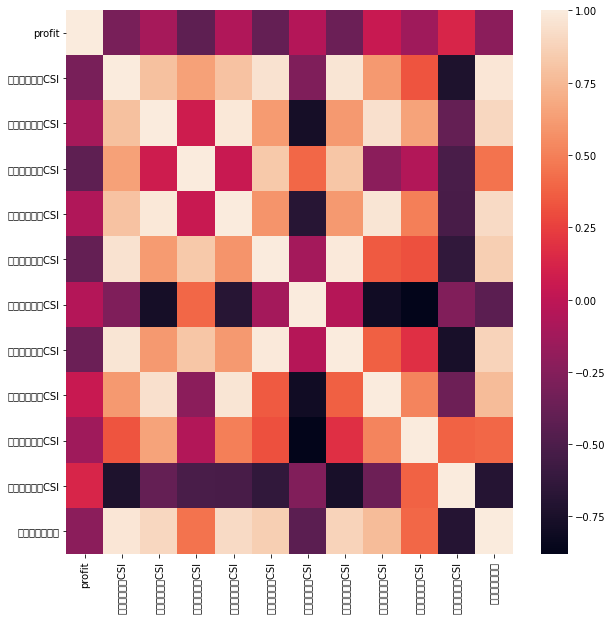

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

# sns.scatterplot(x=df_fund_of_fund.소비지출전망CSI, y=df_fund_of_fund.profit )
sns.heatmap(fof_cor)

### Train, Test split

In [258]:
## Train, Eval, Test split

# train, test 데이터를 나눠주겠습니다. 

from sklearn.model_selection import train_test_split
X = df_fund_of_fund.drop('profit', axis=1)
y = df_fund_of_fund['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train, test 데이터가 잘 나눠졌는지 확인해봅니다.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((390, 11), (98, 11), (390,), (98,))

### Baseline

In [259]:
## baseline : 3년 평균 수익률

y_train.mean()

-0.281051282051282

In [260]:
y_train.describe()

count   390.00
mean     -0.28
std       5.19
min     -31.19
25%      -1.23
50%       0.78
75%       1.94
max      18.53
Name: profit, dtype: float64

In [261]:
## baseline score

from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()]*len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 3.267884812623274


In [262]:
# 성능 확인용 함수

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.options.display.float_format = '{:,.2f}'.format


def eval_models(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

In [263]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3) #LinearRegression.score는 R2
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

### OLS

In [264]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train, y_train)

# 성능 비교
ols_train, ols_val, ols_test = print_score(ols, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.231
검증 세트 r2_score : 0.14
테스트 세트 r2_score : 0.034


In [265]:
from sklearn.feature_selection import f_regression, SelectKBest

# selector를 정의합니다. 
# 총 11개 특성 중 5개만 사용하는 경우

selector = SelectKBest(score_func= f_regression, k=5)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)

# 어떤 특성이 선택되었는지 확인해봅시다.
selector.get_feature_names_out()

array(['생활형편전망CSI', '향후경기전망CSI', '가계저축전망CSI', '취업기회전망CSI', '소비자심리지수'],
      dtype=object)

In [266]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 11개의 특성으로 다중선형회귀 모델을 만들어보겠습니다.
ols_fs = LinearRegression()
ols_fs.fit(X_train, y_train)

# 성능 비교
ols_fs_train, ols_fs_val, ols_fs_test = print_score(ols_fs, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.231
검증 세트 r2_score : 0.14
테스트 세트 r2_score : 0.034


### RidgeCV

In [267]:
# RidgeCV

from sklearn.linear_model import RidgeCV, LassoCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)          # 50번의 시험을 통해 RSS+Penalty가 낮고, variance도 낮은 alpha 값 찾기?
ridge = RidgeCV(alphas=alphas, cv=5)    # 5 folds, 10가지 lamda를 시험.
ridge.fit(X_train, y_train)

print("alpha: ", ridge.alpha_)


# 성능 확인
ridge_train, ridge_val, ridge_test = print_score(ridge, X_train, y_train, X_test, y_test)

alpha:  91
학습 세트 r2_score : 0.231
검증 세트 r2_score : 0.153
테스트 세트 r2_score : 0.035


### LassoCV

In [268]:
# LassoCV

from sklearn.linear_model import LassoCV

# lassocv로 학습
alphas = np.arange(10, 200, 10)
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train, y_train)

print("alpha: ", lasso.alpha_)

# 성능 확인
lasso_train, lasso_val, lasso_test = print_score(lasso, X_train, y_train, X_test, y_test)

alpha:  10
학습 세트 r2_score : 0.095
검증 세트 r2_score : 0.04
테스트 세트 r2_score : -0.004


# Model - 혼합주식형

In [269]:
df_fund_of_fund = df_joined_4yr[df_joined_4yr.productType == '혼합주식형']
df_fund_of_fund = df_fund_of_fund.drop(columns='productType')
df_fund_of_fund

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
20,-32.23,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
40,-28.47,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
44,-27.58,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
61,-159.32,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
67,-29.35,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...
7301,4.74,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7308,-2.16,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7363,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7398,-7.21,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40


In [270]:
df_fund_of_fund = df_fund_of_fund.reset_index(drop=True)

In [271]:
fof_cor = df_fund_of_fund.corr()
fof_cor

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
profit,1.00,-0.42,-0.40,-0.31,-0.32,-0.46,0.34,-0.39,-0.24,-0.51,0.01,-0.40
생활형편전망CSI,-0.42,1.00,0.79,0.64,0.80,0.95,-0.27,0.96,0.60,0.33,-0.73,0.97
가계수입전망CSI,-0.40,0.79,1.00,0.07,0.98,0.62,-0.77,0.61,0.94,0.65,-0.39,0.90
향후경기전망CSI,-0.31,0.64,0.07,1.00,0.05,0.83,0.40,0.82,-0.22,-0.05,-0.51,0.45
소비지출전망CSI,-0.32,0.80,0.98,0.05,1.00,0.59,-0.69,0.61,0.96,0.50,-0.52,0.91
가계저축전망CSI,-0.46,0.95,0.62,0.83,0.59,1.00,-0.11,0.99,0.35,0.31,-0.64,0.86
주택가격전망CSI,0.34,-0.27,-0.77,0.40,-0.69,-0.11,1.00,-0.04,-0.79,-0.88,-0.26,-0.44
취업기회전망CSI,-0.39,0.96,0.61,0.82,0.61,0.99,-0.04,1.00,0.38,0.18,-0.75,0.88
임금수준전망CSI,-0.24,0.60,0.94,-0.22,0.96,0.35,-0.79,0.38,1.00,0.52,-0.35,0.77
금리수준전망CSI,-0.51,0.33,0.65,-0.05,0.50,0.31,-0.88,0.18,0.52,1.00,0.38,0.40


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_

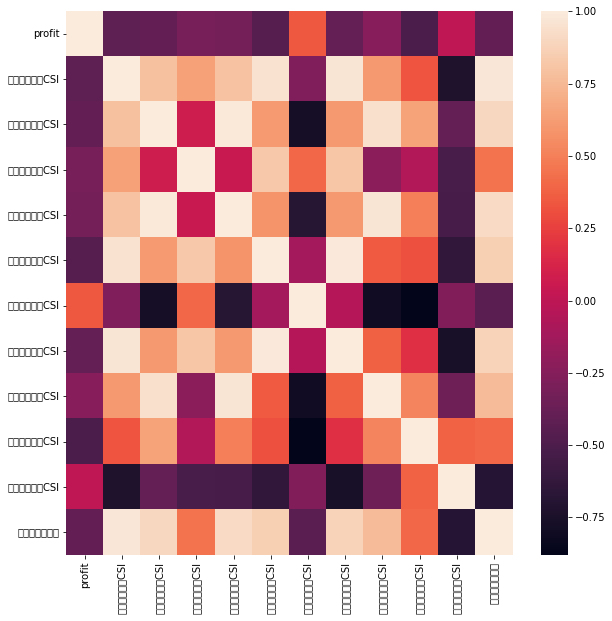

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

# sns.scatterplot(x=df_fund_of_fund.소비지출전망CSI, y=df_fund_of_fund.profit )
sns.heatmap(fof_cor)

### Train, Test split

In [273]:
## Train, Eval, Test split

# train, test 데이터를 나눠주겠습니다. 

from sklearn.model_selection import train_test_split
X = df_fund_of_fund.drop('profit', axis=1)
y = df_fund_of_fund['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train, test 데이터가 잘 나눠졌는지 확인해봅니다.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((153, 11), (39, 11), (153,), (39,))

### Baseline

In [274]:
## baseline : 3년 평균 수익률

y_train.mean()

1.4047058823529417

In [275]:
y_train.describe()

count    153.00
mean       1.40
std       27.12
min     -159.32
25%       -2.37
50%        2.80
75%        7.21
max      137.07
Name: profit, dtype: float64

In [276]:
## baseline score

from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()]*len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 14.25613994617455


In [277]:
# 성능 확인용 함수

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.options.display.float_format = '{:,.2f}'.format


def eval_models(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

In [278]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3) #LinearRegression.score는 R2
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

### OLS

In [279]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train, y_train)

# 성능 비교
ols_train, ols_val, ols_test = print_score(ols, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.343
검증 세트 r2_score : 0.332
테스트 세트 r2_score : 0.535


In [280]:
from sklearn.feature_selection import f_regression, SelectKBest

# selector를 정의합니다. 
# 총 11개 특성 중 5개만 사용하는 경우

selector = SelectKBest(score_func= f_regression, k=5)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)

# 어떤 특성이 선택되었는지 확인해봅시다.
selector.get_feature_names_out()

array(['생활형편전망CSI', '가계수입전망CSI', '가계저축전망CSI', '금리수준전망CSI', '소비자심리지수'],
      dtype=object)

In [281]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 11개의 특성으로 다중선형회귀 모델을 만들어보겠습니다.
ols_fs = LinearRegression()
ols_fs.fit(X_train, y_train)

# 성능 비교
ols_fs_train, ols_fs_val, ols_fs_test = print_score(ols_fs, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.343
검증 세트 r2_score : 0.332
테스트 세트 r2_score : 0.535


### RidgeCV

In [282]:
# RidgeCV

from sklearn.linear_model import RidgeCV, LassoCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)          # 50번의 시험을 통해 RSS+Penalty가 낮고, variance도 낮은 alpha 값 찾기?
ridge = RidgeCV(alphas=alphas, cv=5)    # 5 folds, 10가지 lamda를 시험.
ridge.fit(X_train, y_train)

print("alpha: ", ridge.alpha_)


# 성능 확인
ridge_train, ridge_val, ridge_test = print_score(ridge, X_train, y_train, X_test, y_test)

alpha:  91
학습 세트 r2_score : 0.344
검증 세트 r2_score : 0.332
테스트 세트 r2_score : 0.535


### LassoCV

In [283]:
# LassoCV

from sklearn.linear_model import LassoCV

# lassocv로 학습
alphas = np.arange(10, 200, 10)
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train, y_train)

print("alpha: ", lasso.alpha_)

# 성능 확인
lasso_train, lasso_val, lasso_test = print_score(lasso, X_train, y_train, X_test, y_test)

alpha:  10
학습 세트 r2_score : 0.339
검증 세트 r2_score : 0.331
테스트 세트 r2_score : 0.522


# Model - 혼합채권형

In [284]:
df_fund_of_fund = df_joined_4yr[df_joined_4yr.productType == '혼합채권형']
df_fund_of_fund = df_fund_of_fund.drop(columns='productType')
df_fund_of_fund

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
45,-9.68,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
62,-20.96,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
100,-12.27,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
107,1.95,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
129,-19.25,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...
7474,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7476,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7477,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7497,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40


In [285]:
df_fund_of_fund = df_fund_of_fund.reset_index(drop=True)

In [286]:
fof_cor = df_fund_of_fund.corr()
fof_cor

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
profit,1.00,-0.43,-0.36,-0.42,-0.24,-0.53,0.33,-0.43,-0.14,-0.59,-0.08,-0.37
생활형편전망CSI,-0.43,1.00,0.79,0.64,0.80,0.95,-0.27,0.96,0.60,0.33,-0.73,0.97
가계수입전망CSI,-0.36,0.79,1.00,0.07,0.98,0.62,-0.77,0.61,0.94,0.65,-0.39,0.90
향후경기전망CSI,-0.42,0.64,0.07,1.00,0.05,0.83,0.40,0.82,-0.22,-0.05,-0.51,0.45
소비지출전망CSI,-0.24,0.80,0.98,0.05,1.00,0.59,-0.69,0.61,0.96,0.50,-0.52,0.91
가계저축전망CSI,-0.53,0.95,0.62,0.83,0.59,1.00,-0.11,0.99,0.35,0.31,-0.64,0.86
주택가격전망CSI,0.33,-0.27,-0.77,0.40,-0.69,-0.11,1.00,-0.04,-0.79,-0.88,-0.26,-0.44
취업기회전망CSI,-0.43,0.96,0.61,0.82,0.61,0.99,-0.04,1.00,0.38,0.18,-0.75,0.88
임금수준전망CSI,-0.14,0.60,0.94,-0.22,0.96,0.35,-0.79,0.38,1.00,0.52,-0.35,0.77
금리수준전망CSI,-0.59,0.33,0.65,-0.05,0.50,0.31,-0.88,0.18,0.52,1.00,0.38,0.40


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_

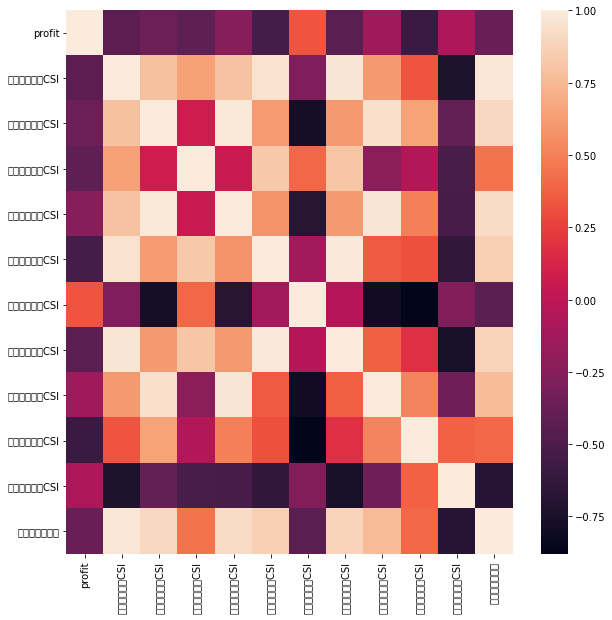

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

# sns.scatterplot(x=df_fund_of_fund.소비지출전망CSI, y=df_fund_of_fund.profit )
sns.heatmap(fof_cor)

### Train, Test split

In [288]:
## Train, Eval, Test split

# train, test 데이터를 나눠주겠습니다. 

from sklearn.model_selection import train_test_split
X = df_fund_of_fund.drop('profit', axis=1)
y = df_fund_of_fund['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train, test 데이터가 잘 나눠졌는지 확인해봅니다.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((489, 11), (123, 11), (489,), (123,))

### Baseline

In [289]:
## baseline : 3년 평균 수익률

y_train.mean()

0.8814110429447852

In [290]:
y_train.describe()

count   489.00
mean      0.88
std       7.11
min     -21.64
25%      -0.76
50%       1.28
75%       4.81
max      30.52
Name: profit, dtype: float64

In [291]:
## baseline score

from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()]*len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 5.049927860790143


In [292]:
# 성능 확인용 함수

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.options.display.float_format = '{:,.2f}'.format


def eval_models(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

In [293]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3) #LinearRegression.score는 R2
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

### OLS

In [294]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train, y_train)

# 성능 비교
ols_train, ols_val, ols_test = print_score(ols, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.561
검증 세트 r2_score : 0.551
테스트 세트 r2_score : 0.573


In [295]:
from sklearn.feature_selection import f_regression, SelectKBest

# selector를 정의합니다. 
# 총 11개 특성 중 5개만 사용하는 경우

selector = SelectKBest(score_func= f_regression, k=5)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)

# 어떤 특성이 선택되었는지 확인해봅시다.
selector.get_feature_names_out()

array(['생활형편전망CSI', '향후경기전망CSI', '가계저축전망CSI', '취업기회전망CSI', '금리수준전망CSI'],
      dtype=object)

In [296]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 11개의 특성으로 다중선형회귀 모델을 만들어보겠습니다.
ols_fs = LinearRegression()
ols_fs.fit(X_train, y_train)

# 성능 비교
ols_fs_train, ols_fs_val, ols_fs_test = print_score(ols_fs, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.561
검증 세트 r2_score : 0.551
테스트 세트 r2_score : 0.573


### RidgeCV

In [297]:
# RidgeCV

from sklearn.linear_model import RidgeCV, LassoCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)          # 50번의 시험을 통해 RSS+Penalty가 낮고, variance도 낮은 alpha 값 찾기?
ridge = RidgeCV(alphas=alphas, cv=5)    # 5 folds, 10가지 lamda를 시험.
ridge.fit(X_train, y_train)

print("alpha: ", ridge.alpha_)


# 성능 확인
ridge_train, ridge_val, ridge_test = print_score(ridge, X_train, y_train, X_test, y_test)

alpha:  91
학습 세트 r2_score : 0.562
검증 세트 r2_score : 0.558
테스트 세트 r2_score : 0.579


### LassoCV

In [298]:
# LassoCV

from sklearn.linear_model import LassoCV

# lassocv로 학습
alphas = np.arange(10, 200, 10)
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train, y_train)

print("alpha: ", lasso.alpha_)

# 성능 확인
lasso_train, lasso_val, lasso_test = print_score(lasso, X_train, y_train, X_test, y_test)

alpha:  10
학습 세트 r2_score : 0.485
검증 세트 r2_score : 0.482
테스트 세트 r2_score : 0.5


# Model - 부동산

In [299]:
df_fund_of_fund = df_joined_4yr[df_joined_4yr.productType == '부동산']
df_fund_of_fund = df_fund_of_fund.drop(columns='productType')
df_fund_of_fund

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
156,-24.06,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
325,-5.16,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
409,-23.63,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
557,-21.28,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
593,-6.70,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...
7420,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7429,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7434,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7472,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40


In [300]:
df_fund_of_fund = df_fund_of_fund.reset_index(drop=True)

In [301]:
fof_cor = df_fund_of_fund.corr()
fof_cor

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
profit,1.00,-0.80,-0.71,-0.42,-0.71,-0.73,0.32,-0.74,-0.58,-0.33,0.55,-0.80
생활형편전망CSI,-0.80,1.00,0.79,0.64,0.80,0.95,-0.27,0.96,0.60,0.33,-0.73,0.97
가계수입전망CSI,-0.71,0.79,1.00,0.07,0.98,0.62,-0.77,0.61,0.94,0.65,-0.39,0.90
향후경기전망CSI,-0.42,0.64,0.07,1.00,0.05,0.83,0.40,0.82,-0.22,-0.05,-0.51,0.45
소비지출전망CSI,-0.71,0.80,0.98,0.05,1.00,0.59,-0.69,0.61,0.96,0.50,-0.52,0.91
가계저축전망CSI,-0.73,0.95,0.62,0.83,0.59,1.00,-0.11,0.99,0.35,0.31,-0.64,0.86
주택가격전망CSI,0.32,-0.27,-0.77,0.40,-0.69,-0.11,1.00,-0.04,-0.79,-0.88,-0.26,-0.44
취업기회전망CSI,-0.74,0.96,0.61,0.82,0.61,0.99,-0.04,1.00,0.38,0.18,-0.75,0.88
임금수준전망CSI,-0.58,0.60,0.94,-0.22,0.96,0.35,-0.79,0.38,1.00,0.52,-0.35,0.77
금리수준전망CSI,-0.33,0.33,0.65,-0.05,0.50,0.31,-0.88,0.18,0.52,1.00,0.38,0.40


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_

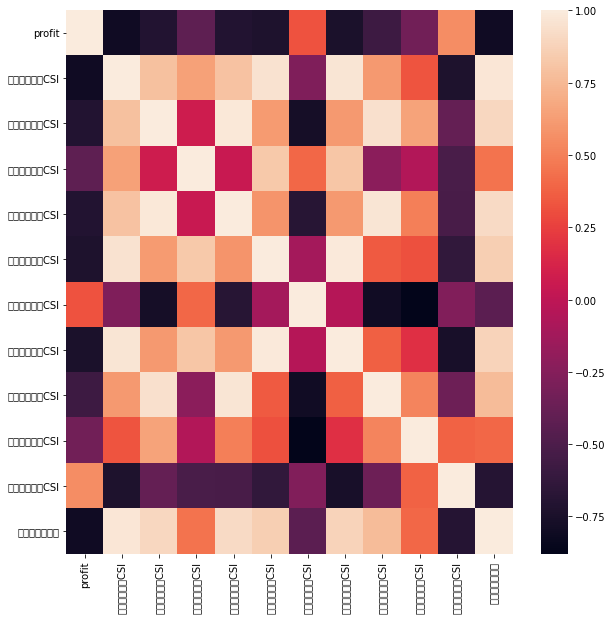

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

# sns.scatterplot(x=df_fund_of_fund.소비지출전망CSI, y=df_fund_of_fund.profit )
sns.heatmap(fof_cor)

### Train, Test split

In [303]:
## Train, Eval, Test split

# train, test 데이터를 나눠주겠습니다. 

from sklearn.model_selection import train_test_split
X = df_fund_of_fund.drop('profit', axis=1)
y = df_fund_of_fund['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train, test 데이터가 잘 나눠졌는지 확인해봅니다.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 11), (32, 11), (124,), (32,))

### Baseline

In [304]:
## baseline : 3년 평균 수익률

y_train.mean()

0.7580645161290326

In [305]:
y_train.describe()

count   124.00
mean      0.76
std      16.96
min     -48.06
25%      -9.20
50%       0.00
75%      12.25
max      52.06
Name: profit, dtype: float64

In [306]:
## baseline score

from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()]*len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 12.36070239334027


In [307]:
# 성능 확인용 함수

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.options.display.float_format = '{:,.2f}'.format


def eval_models(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

In [308]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3) #LinearRegression.score는 R2
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

### OLS

In [309]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train, y_train)

# 성능 비교
ols_train, ols_val, ols_test = print_score(ols, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.657
검증 세트 r2_score : 0.605
테스트 세트 r2_score : 0.619


In [310]:
from sklearn.feature_selection import f_regression, SelectKBest

# selector를 정의합니다. 
# 총 11개 특성 중 5개만 사용하는 경우

selector = SelectKBest(score_func= f_regression, k=5)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)

# 어떤 특성이 선택되었는지 확인해봅시다.
selector.get_feature_names_out()

array(['생활형편전망CSI', '소비지출전망CSI', '가계저축전망CSI', '취업기회전망CSI', '소비자심리지수'],
      dtype=object)

In [311]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 11개의 특성으로 다중선형회귀 모델을 만들어보겠습니다.
ols_fs = LinearRegression()
ols_fs.fit(X_train, y_train)

# 성능 비교
ols_fs_train, ols_fs_val, ols_fs_test = print_score(ols_fs, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.657
검증 세트 r2_score : 0.605
테스트 세트 r2_score : 0.619


### RidgeCV

In [312]:
# RidgeCV

from sklearn.linear_model import RidgeCV, LassoCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)          # 50번의 시험을 통해 RSS+Penalty가 낮고, variance도 낮은 alpha 값 찾기?
ridge = RidgeCV(alphas=alphas, cv=5)    # 5 folds, 10가지 lamda를 시험.
ridge.fit(X_train, y_train)

print("alpha: ", ridge.alpha_)


# 성능 확인
ridge_train, ridge_val, ridge_test = print_score(ridge, X_train, y_train, X_test, y_test)

alpha:  91
학습 세트 r2_score : 0.657
검증 세트 r2_score : 0.603
테스트 세트 r2_score : 0.621


### LassoCV

In [313]:
# LassoCV

from sklearn.linear_model import LassoCV

# lassocv로 학습
alphas = np.arange(10, 200, 10)
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train, y_train)

print("alpha: ", lasso.alpha_)

# 성능 확인
lasso_train, lasso_val, lasso_test = print_score(lasso, X_train, y_train, X_test, y_test)

alpha:  10
학습 세트 r2_score : 0.635
검증 세트 r2_score : 0.577
테스트 세트 r2_score : 0.623


# Model - 파생상품

In [314]:
df_fund_of_fund = df_joined_4yr[df_joined_4yr.productType == '파생상품']
df_fund_of_fund = df_fund_of_fund.drop(columns='productType')
df_fund_of_fund

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
90,-19.26,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
105,-28.00,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
117,-35.49,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
131,-62.84,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
144,-53.57,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...
7443,14.11,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7466,12.07,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7488,0.00,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40
7490,10.72,91.00,99.00,72.00,109.00,93.00,95.00,74.00,119.00,132.00,101.00,97.40


In [315]:
df_fund_of_fund = df_fund_of_fund.reset_index(drop=True)

In [316]:
fof_cor = df_fund_of_fund.corr()
fof_cor

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
profit,1.00,-0.53,-0.41,-0.49,-0.32,-0.61,0.29,-0.54,-0.19,-0.54,0.06,-0.47
생활형편전망CSI,-0.53,1.00,0.79,0.64,0.80,0.95,-0.27,0.96,0.60,0.33,-0.73,0.97
가계수입전망CSI,-0.41,0.79,1.00,0.07,0.98,0.62,-0.77,0.61,0.94,0.65,-0.39,0.90
향후경기전망CSI,-0.49,0.64,0.07,1.00,0.05,0.83,0.40,0.82,-0.22,-0.05,-0.51,0.45
소비지출전망CSI,-0.32,0.80,0.98,0.05,1.00,0.59,-0.69,0.61,0.96,0.50,-0.52,0.91
가계저축전망CSI,-0.61,0.95,0.62,0.83,0.59,1.00,-0.11,0.99,0.35,0.31,-0.64,0.86
주택가격전망CSI,0.29,-0.27,-0.77,0.40,-0.69,-0.11,1.00,-0.04,-0.79,-0.88,-0.26,-0.44
취업기회전망CSI,-0.54,0.96,0.61,0.82,0.61,0.99,-0.04,1.00,0.38,0.18,-0.75,0.88
임금수준전망CSI,-0.19,0.60,0.94,-0.22,0.96,0.35,-0.79,0.38,1.00,0.52,-0.35,0.77
금리수준전망CSI,-0.54,0.33,0.65,-0.05,0.50,0.31,-0.88,0.18,0.52,1.00,0.38,0.40


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_

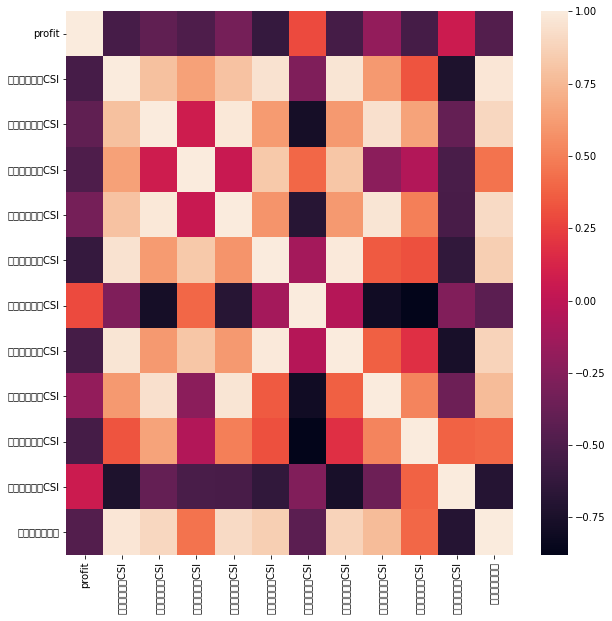

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

# sns.scatterplot(x=df_fund_of_fund.소비지출전망CSI, y=df_fund_of_fund.profit )
sns.heatmap(fof_cor)

### Train, Test split

In [318]:
## Train, Eval, Test split

# train, test 데이터를 나눠주겠습니다. 

from sklearn.model_selection import train_test_split
X = df_fund_of_fund.drop('profit', axis=1)
y = df_fund_of_fund['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train, test 데이터가 잘 나눠졌는지 확인해봅니다.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((262, 11), (66, 11), (262,), (66,))

### Baseline

In [319]:
## baseline : 3년 평균 수익률

y_train.mean()

3.371755725190839

In [320]:
y_train.describe()

count   262.00
mean      3.37
std      25.54
min     -75.49
25%     -13.70
50%       4.37
75%      17.10
max      69.74
Name: profit, dtype: float64

In [321]:
## baseline score

from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()]*len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 19.742249868888763


In [322]:
# 성능 확인용 함수

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.options.display.float_format = '{:,.2f}'.format


def eval_models(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

In [323]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3) #LinearRegression.score는 R2
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

### OLS

In [324]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train, y_train)

# 성능 비교
ols_train, ols_val, ols_test = print_score(ols, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.54
검증 세트 r2_score : 0.521
테스트 세트 r2_score : 0.611


In [325]:
from sklearn.feature_selection import f_regression, SelectKBest

# selector를 정의합니다. 
# 총 11개 특성 중 5개만 사용하는 경우

selector = SelectKBest(score_func= f_regression, k=5)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)

# 어떤 특성이 선택되었는지 확인해봅시다.
selector.get_feature_names_out()

array(['생활형편전망CSI', '향후경기전망CSI', '가계저축전망CSI', '취업기회전망CSI', '금리수준전망CSI'],
      dtype=object)

In [326]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 11개의 특성으로 다중선형회귀 모델을 만들어보겠습니다.
ols_fs = LinearRegression()
ols_fs.fit(X_train, y_train)

# 성능 비교
ols_fs_train, ols_fs_val, ols_fs_test = print_score(ols_fs, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.54
검증 세트 r2_score : 0.521
테스트 세트 r2_score : 0.611


### RidgeCV

In [327]:
# RidgeCV

from sklearn.linear_model import RidgeCV, LassoCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)          # 50번의 시험을 통해 RSS+Penalty가 낮고, variance도 낮은 alpha 값 찾기?
ridge = RidgeCV(alphas=alphas, cv=5)    # 5 folds, 10가지 lamda를 시험.
ridge.fit(X_train, y_train)

print("alpha: ", ridge.alpha_)


# 성능 확인
ridge_train, ridge_val, ridge_test = print_score(ridge, X_train, y_train, X_test, y_test)

alpha:  91
학습 세트 r2_score : 0.54
검증 세트 r2_score : 0.531
테스트 세트 r2_score : 0.612


### LassoCV

In [328]:
# LassoCV

from sklearn.linear_model import LassoCV

# lassocv로 학습
alphas = np.arange(10, 200, 10)
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train, y_train)

print("alpha: ", lasso.alpha_)

# 성능 확인
lasso_train, lasso_val, lasso_test = print_score(lasso, X_train, y_train, X_test, y_test)

alpha:  10
학습 세트 r2_score : 0.534
검증 세트 r2_score : 0.526
테스트 세트 r2_score : 0.599


# Model - 특별자산

In [329]:
df_fund_of_fund = df_joined_4yr[df_joined_4yr.productType == '특별자산']
df_fund_of_fund = df_fund_of_fund.drop(columns='productType')
df_fund_of_fund

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
376,-6.50,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
759,-1.43,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
810,7.95,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
814,10.16,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
1083,-6.36,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
1161,23.30,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
1217,15.26,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
1452,12.10,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
1773,-6.24,96.00,100.00,88.00,110.00,97.00,107.00,89.00,117.00,137.00,100.00,103.80
2258,2.57,89.00,93.00,81.00,99.00,93.00,132.00,74.00,109.00,99.00,101.00,90.90


In [330]:
df_fund_of_fund = df_fund_of_fund.reset_index(drop=True)

In [331]:
fof_cor = df_fund_of_fund.corr()
fof_cor

,profit,생활형편전망CSI,가계수입전망CSI,향후경기전망CSI,소비지출전망CSI,가계저축전망CSI,주택가격전망CSI,취업기회전망CSI,임금수준전망CSI,금리수준전망CSI,가계부채전망CSI,소비자심리지수
profit,1.00,-0.33,-0.22,-0.07,-0.35,-0.19,-0.17,-0.30,-0.31,0.40,0.67,-0.36
생활형편전망CSI,-0.33,1.00,0.79,0.64,0.80,0.95,-0.27,0.96,0.60,0.33,-0.73,0.97
가계수입전망CSI,-0.22,0.79,1.00,0.07,0.98,0.62,-0.77,0.61,0.94,0.65,-0.39,0.90
향후경기전망CSI,-0.07,0.64,0.07,1.00,0.05,0.83,0.40,0.82,-0.22,-0.05,-0.51,0.45
소비지출전망CSI,-0.35,0.80,0.98,0.05,1.00,0.59,-0.69,0.61,0.96,0.50,-0.52,0.91
가계저축전망CSI,-0.19,0.95,0.62,0.83,0.59,1.00,-0.11,0.99,0.35,0.31,-0.64,0.86
주택가격전망CSI,-0.17,-0.27,-0.77,0.40,-0.69,-0.11,1.00,-0.04,-0.79,-0.88,-0.26,-0.44
취업기회전망CSI,-0.30,0.96,0.61,0.82,0.61,0.99,-0.04,1.00,0.38,0.18,-0.75,0.88
임금수준전망CSI,-0.31,0.60,0.94,-0.22,0.96,0.35,-0.79,0.38,1.00,0.52,-0.35,0.77
금리수준전망CSI,0.40,0.33,0.65,-0.05,0.50,0.31,-0.88,0.18,0.52,1.00,0.38,0.40


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_

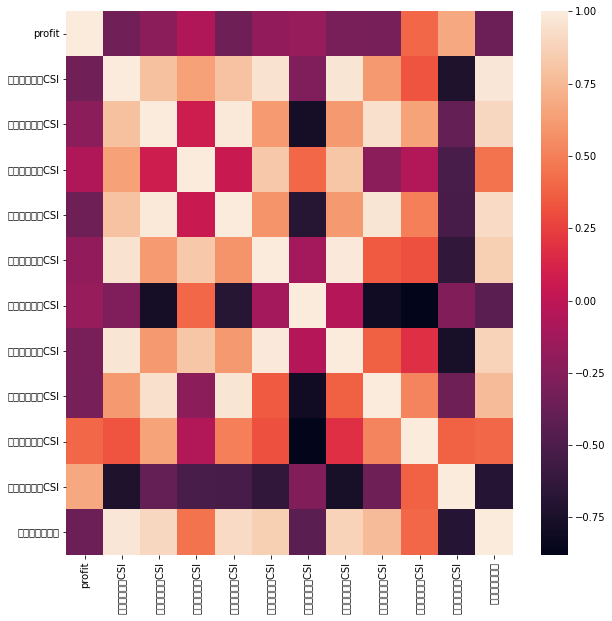

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

# sns.scatterplot(x=df_fund_of_fund.소비지출전망CSI, y=df_fund_of_fund.profit )
sns.heatmap(fof_cor)

### Train, Test split

In [333]:
## Train, Eval, Test split

# train, test 데이터를 나눠주겠습니다. 

from sklearn.model_selection import train_test_split
X = df_fund_of_fund.drop('profit', axis=1)
y = df_fund_of_fund['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train, test 데이터가 잘 나눠졌는지 확인해봅니다.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 11), (8, 11), (28,), (8,))

### Baseline

In [334]:
## baseline : 3년 평균 수익률

y_train.mean()

1.1957142857142855

In [335]:
y_train.describe()

count    28.00
mean      1.20
std      11.45
min     -24.13
25%      -6.40
50%       2.58
75%       9.22
max      23.30
Name: profit, dtype: float64

In [336]:
## baseline score

from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()]*len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 8.817653061224492


In [337]:
# 성능 확인용 함수

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.options.display.float_format = '{:,.2f}'.format


def eval_models(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

In [338]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3) #LinearRegression.score는 R2
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

### OLS

In [339]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train, y_train)

# 성능 비교
ols_train, ols_val, ols_test = print_score(ols, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.512
검증 세트 r2_score : 0.155
테스트 세트 r2_score : 0.607


In [340]:
from sklearn.feature_selection import f_regression, SelectKBest

# selector를 정의합니다. 
# 총 11개 특성 중 5개만 사용하는 경우

selector = SelectKBest(score_func= f_regression, k=5)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)

# 어떤 특성이 선택되었는지 확인해봅시다.
selector.get_feature_names_out()

array(['소비지출전망CSI', '주택가격전망CSI', '금리수준전망CSI', '가계부채전망CSI', '소비자심리지수'],
      dtype=object)

In [341]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 11개의 특성으로 다중선형회귀 모델을 만들어보겠습니다.
ols_fs = LinearRegression()
ols_fs.fit(X_train, y_train)

# 성능 비교
ols_fs_train, ols_fs_val, ols_fs_test = print_score(ols_fs, X_train, y_train, X_test, y_test)

학습 세트 r2_score : 0.512
검증 세트 r2_score : 0.155
테스트 세트 r2_score : 0.607


### RidgeCV

In [342]:
# RidgeCV

from sklearn.linear_model import RidgeCV, LassoCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)          # 50번의 시험을 통해 RSS+Penalty가 낮고, variance도 낮은 alpha 값 찾기?
ridge = RidgeCV(alphas=alphas, cv=5)    # 5 folds, 10가지 lamda를 시험.
ridge.fit(X_train, y_train)

print("alpha: ", ridge.alpha_)


# 성능 확인
ridge_train, ridge_val, ridge_test = print_score(ridge, X_train, y_train, X_test, y_test)

alpha:  91
학습 세트 r2_score : 0.511
검증 세트 r2_score : 0.17
테스트 세트 r2_score : 0.586


### LassoCV

In [343]:
# LassoCV

from sklearn.linear_model import LassoCV

# lassocv로 학습
alphas = np.arange(10, 200, 10)
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train, y_train)

print("alpha: ", lasso.alpha_)

# 성능 확인
lasso_train, lasso_val, lasso_test = print_score(lasso, X_train, y_train, X_test, y_test)

alpha:  10
학습 세트 r2_score : 0.44
검증 세트 r2_score : -0.244
테스트 세트 r2_score : 0.391
